In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

In [28]:
df = pd.read_csv("income.csv")
df.head(5)
df.shape

(40, 2)

In [29]:
df1 = pd.read_excel("missing_value1.xlsx")
df1.head()

,Name,income
0,Raj,NaN
1,Rahul,300
2,Abdula,200
3,Disha,333
4,Alx,na


In [30]:
df1.isnull()

,Name,income
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
5,False,True
6,False,False


In [5]:
df1.isna()

,Name,income
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
5,False,True
6,False,False


In [7]:
df1.isnull().sum()


Name      0
income    2
dtype: int64

In [9]:
df1.isnull().sum().sum()


np.int64(2)

In [11]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    7 non-null      object
 1   income  5 non-null      object
dtypes: object(2)
memory usage: 244.0+ bytes


In [13]:
df1.isnull().mean() * 100


Name       0.000000
income    28.571429
dtype: float64

In [15]:
df1['income'].isnull().sum()


np.int64(2)

In [17]:
df1[df1.isnull().any(axis=1)]


,Name,income
0,Raj,NaN
5,Rishabh,NaN


In [19]:
df1[df1.isnull().all(axis=1)]


,Name,income


<Axes: >

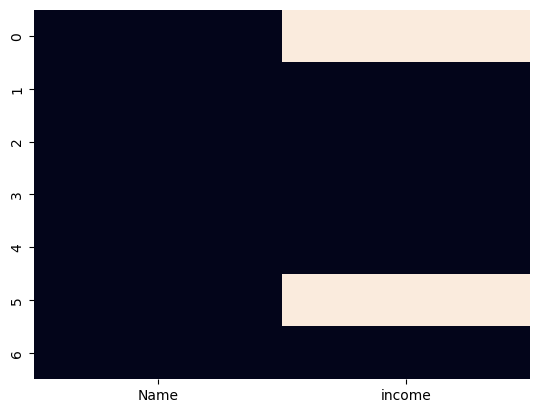

In [21]:
import seaborn as sns
sns.heatmap(df1.isnull(), cbar=False)


In [22]:
import numpy as np

np.isnan(df1['income'])   # only works for numeric columns


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [24]:
#Now it time to find the "Na" values.

In [25]:
df1[df1['income'].str.contains('na', case=False, na=False)]


,Name,income
4,Alx,na


In [26]:
df1['income'][df1['income'].str.contains('na', case=False, na=False)]


4    na
Name: income, dtype: object

In [31]:
df1['income'][df1['income'].str.contains('na', case=False, na=False)]


4    na
Name: income, dtype: object

In [33]:
m1 = df1[df1.apply(lambda col: col.astype(str)
            .str.contains('na', case=False, na=False)).any(axis=1)]
m1

,Name,income
0,Raj,NaN
4,Alx,na
5,Rishabh,NaN


In [35]:
m1.count()

Name      3
income    1
dtype: int64

In [38]:
df1['income'].dropna().unique()
[df1 for df1 in df1['income'].unique() if 'na' in str(df1).lower()]


[nan, 'na']

In [40]:
# df1['income'].skew()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
